<a href="https://colab.research.google.com/github/evillag/TEC_DL_II-2022/blob/main/TP1/TP1_IBVOEV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

# Curso de Aprendizaje Automático
# Trabajo Practico 1: 

**Escuela de Ingeniería en Computación | Instituto Tecnológico de Costa Rica**

Realizado por:

*   Victoria Orozco
*   Ignacio Barquero
*   Esteban Villalobos

Fecha de entrega:

* 2 de Octubre de 2022

El presente proyecto introduce el algoritmo de contornos activos para la segmentación de imágenes, el cual implementa un enfoque de optimización voraz.

Tipo de entrega: 

* Digital, por medio de la plataforma TEC-digital.

Modo de trabajo

* Grupos de 2/3 personas.

## 1) (30 puntos) Optimización de funciones

Para las siguientes funciones:

$f_{1}\left(x,y\right)=xe^{\left(-x^{2}-y^{2}\right)}$


### 1. Grafique tal función, y distinga si las funciones son convexas o no, y los puntos mínimos y regiones o puntos silla.

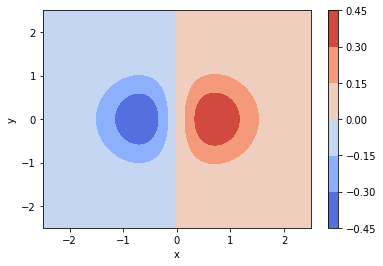

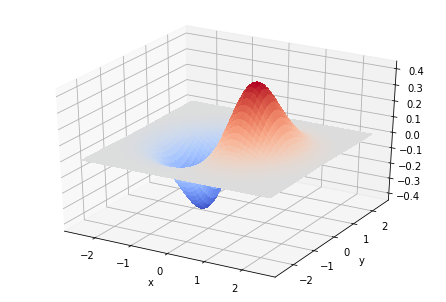

In [ ]:
%matplotlib inline
def f_1(x, y):
  return x * np.exp(-x**2-y**2)


def graph(min_x=-2.5, min_y=-2.5, max_x=2.5, max_y=2.5, interval=.001):
  x = np.arange(min_x, max_x, interval)
  y = np.arange(min_y, max_y, interval)
  X, Y = np.meshgrid(x, y)
  Z = f_1(X, Y)

  
  # x_min, y_min = np.unravel_index(np.argmin(Z, axis=None), Z.shape)
  # x_max, y_max = np.unravel_index(np.argmax(Z, axis=None), Z.shape)
 
  plt.figure()
  CS = plt.contourf(X, Y, Z, cmap=cm.coolwarm)
  plt.colorbar()
  plt.xlabel('x')
  plt.ylabel('y')
  plt.draw()
  
  fig = plt.figure()
  ax = Axes3D(fig)
  ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)
  plt.xlabel('x')
  plt.ylabel('y')
  plt.draw()
 

  return Z

Z = graph()

### 2. (10 puntos) Implemente el algoritmo del descenso del gradiente con moméntum:

**a)** Escoja un coeficiente de aprendizaje $\alpha$ que permita la convergencia y reporte los resultados para 10 corridas:

1. La tolerancia fijada para la convergencia en términos de la magnitud del gradiente, 

2. La cantidad de iteraciones necesarias para converger,

3. El punto de convergencia.

4. Escoga una de las corridas y en una gráfica muestre los puntos probados (visitados) por el algoritmo.



**b)** Escoja un $\alpha$ relativamente grande respecto al valor seleccionado ¿Qué sucede? ¿Permite un $\alpha$ muy grande la convergencia?


**c)** ¿Qué sucede si escoge un $\alpha$ muy pequeño? 


**d)** ¿Cómo puede el algoritmo de descenso de gradiente evitar quedar atrapado en mínimos locales o puntos silla?

### 3. (20 puntos) Implemente el algoritmo de Newton-Raphson:

**a)** Calcule la matriz Hessiana demostrando cada paso intermedio.

**b)** Reporte los resultados para 10 corridas:

1. La tolerancia fijada para la convergencia en términos de la magnitud del gradiente,

2. La cantidad de iteraciones necesarias para converger,

3. El punto de convergencia.

4. Escoga una de las corridas y en una gráfica muestre los puntos probados por el algoritmo.

### 4. Investigue y reporte las principales ventajas y desventajas, usando los resultados obtenidos, del algoritmo Newton Raphson respecto al algoritmo del descenso del gradiente con moméntum, citando adecuadamente las referencias.

## 2) (30 puntos) Perceptrón multi-capa para detección de glaucoma en imágenes de fondo de ojo

### a) Resultado del entrenamiento con diferentes coeficientes de aprendizaje $α$

Las imágenes de entrenamiento tienen diferentes dimensiones, que rondan los 350x350 a 550x500 pixeles aproximadamente, a color. Se tomó la decisión de reducir sus dimensiones a 128x128, así como convertirlas a escala de grises, lo cual generó 16384 pixeles por imagen. Esto para evitar errores de memoria a la hora de realizar el entrenamiento:

> Se hicieron pruebas con resulociones más altas y con los tres canales de color (R, G, B), sin embargo el ambiente de ejecución disponible se quedaba sin memoria despues de algunos cuantos epochs.


Todos los modelos fueron creados con valores de pesos aleatorios asignados por pytorch, donde la red neronal tenia las siguientes caracteristicas:


*   Tamaño de la capa de entrada: $16384$ neuronas (una por pixel), $4096$ de salida, usando ReLU como función de activación.
*   Capas oculta: $1$, con $4096$ neuronas de entrada y $256$ de salida, usando ReLU como función de activación.
* Capa de salida: $256$ neuronas de entrada, y $2$ de salida (una para cada clase), aplicando la función de activación LogSoftmax, para obtener la probabilidad de que la observación pertenezca a cada clase.


El entrenamiento de todos los modelos consistió en $15$ epochs.

Se utilizó el algoritmo SGD con momentum ($momentum = 0.9$), y se probaron diferentes coeficientes de aprendizaje, cuyos resultados se detallan a continuación:

Alpha | Accuracy
------|---------
0.001 | 0.70476
0.01  | 0.49523
0.1   | 0.5
0.3$^{(1)}$  | 0.5

$^{(1)}$ Con   $α=0.3$ el accuracy fue `nan`, posiblemente tiende a $-∞$.




### b) Descripción de los cambios para que funcionara el código provisto con el dataset del trabajo práctico

TODO


### c) Código fuente

In [ ]:
import argparse
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision

from time import time
from torch import nn, optim
from torch.optim.lr_scheduler import StepLR
from torchvision import datasets, transforms

#### Descarga y extracción del dataset

In [ ]:
%%capture
!wget https://raw.githubusercontent.com/evillag/TEC_DL_II-2022/main/TP1/dataset_train_test.zip
!unzip dataset_train_test.zip
#cleanup
!rm -f dataset_train_test.zip 

#### Estandarización de los datos

In [ ]:
_IMAGE_SIZE = [224, 224]

transform = transforms.Compose([
    transforms.ToTensor(),
    #transforms.Normalize((0.5,), (0.5,)),
    transforms.Resize(_IMAGE_SIZE),
    #transforms.Grayscale(num_output_channels=1),    
])

#### Carga de datos

torch.Size([5, 3, 224, 224])
torch.Size([5])


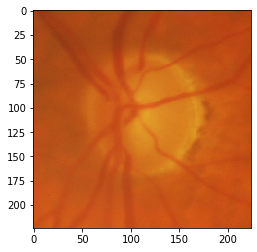

In [ ]:
_TRAIN_PATH = 'dataset_train_test/train'
_TEST_PATH = 'dataset_train_test/test'
_BATCH_SIZE = 5

def load_test_train_data(train_path = _TRAIN_PATH, test_path = _TEST_PATH, 
                         bach_size=64):
    train_set = datasets.ImageFolder(root= train_path, transform = transform)    
    test_set = datasets.ImageFolder(root= test_path, transform = transform)

    train_loader = torch.utils.data.DataLoader(train_set, batch_size=bach_size,
                                               shuffle=True)
    test_loader = torch.utils.data.DataLoader(test_set, batch_size=bach_size,
                                              shuffle=True)
    return train_loader, test_loader

train_loader, test_loader = load_test_train_data(bach_size=_BATCH_SIZE)
dataiter = iter(train_loader) # creating a iterator
images, labels = dataiter.next() # creating images for image and lables for image number (0 to 9) 

print(images.shape)
print(labels.shape)

# grayscale
# plt.imshow(images[0].numpy().squeeze(), cmap='gray_r')

# In order to plot a color image with RGB (3) channels, we need to transform the 
# dimensions for imshow from [3 x 128 x 128] to [128 x 128 x 3]:
im2display = images[0].numpy().transpose((1,2,0))
plt.imshow(im2display, interpolation='nearest');

#### Función para crear el modelo de perceptrón multicapa

In [ ]:
          _COLOR_CHANNELS = 3
_INPUT_LAYER = _IMAGE_SIZE[0] * _IMAGE_SIZE[1]  * _COLOR_CHANNELS  # pixels
_HIDDEN_LAYER_0 = _INPUT_LAYER // 4
_HIDDEN_LAYER_1 = _HIDDEN_LAYER_0 // 64
_OUTPUT_LAYER = 2

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

def create_MLP_model():
    # Model creation with neural net Sequential model
    model=nn.Sequential(
        nn.Linear(_INPUT_LAYER, _HIDDEN_LAYER_0),   # 1 layer: _INPUT_LAYER features (pixels)
        #nn.ReLU(),                                  # Defining Regular linear unit as activation
        nn.Sigmoid(),
        
        nn.Linear(_HIDDEN_LAYER_0, _HIDDEN_LAYER_1),  # 2 Layer: 1/2 size prev layer
        #nn.Tanh(),                                  # Defining Regular linear unit as activation
        nn.Sigmoid(),
        #nn.ReLU(),
        
        nn.Linear(_HIDDEN_LAYER_1, _OUTPUT_LAYER),   # Out Layer
        nn.LogSoftmax(dim=1) # Defining the log softmax to find the probablities for the last output unit
    ) 
    return model


def get_new_model(seed=None):
  if seed is not None:
    torch.manual_seed(seed)

  print("Running on device: ", device)
  mlp_model = create_MLP_model()

  #moving models to device
  mlp_model.to(device)
  #create error criterion
  criterion = nn.NLLLoss() 
  print("MLP model\n", mlp_model)

  return mlp_model, criterion


_model, _criterion = get_new_model()

Running on device:  cuda


#### Función de entrenamiento

In [ ]:
def train_model(model, criterion, trainloader, epochs = 15, lr = 0.01):
    time0 = time()    
    running_loss_list= []
    epochs_list = []
    optimizer = optim.SGD(model.parameters(), lr=lr, momentum=0.9)
    for e in range(epochs):
        running_loss = 0
        
        #go for every batch
        for images, labels in trainloader:          
            #move data to specific device            
            images = images.to(device)
            labels = labels.to(device)

            # Flatenning MNIST images with size [64,784] (for MLP)
            images = images.view(images.shape[0], -1) # hace un flattening de las imagenes para que sean un vector

            # defining gradient in each epoch as 0
            optimizer.zero_grad()
            # modeling for each image batch
            output = model(images)
            
            # calculating the loss
            loss = criterion(output, labels)  # tener cuidado que tanto etiquetas como outputs esten en el formato que espera la func de error

            # This is where the model learns by backpropagating
            loss.backward()  # Calculo de los gradientes (Matrioshka mas grande).

            # And optimizes its weights here
            optimizer.step()  # Actualiza pesos en todas las capas

            # calculating the loss
            running_loss += loss.item()
            # print(f'Output {output}, labels {labels}, loss {loss.item()}')

        else:
            print("Epoch {} - Training loss: {}".format(e, running_loss/len(trainloader)))
    print("\nTraining Time (in minutes) =",(time()-time0)/60)
    return model


#### Función de validación del modelo

In [ ]:
def test_model_mlp(testloader, model):
    correct_count, all_count = 0, 0
    for images,labels in testloader:
      #move data to specific device
      images = images.to(device)
      labels = labels.to(device)
      for i in range(len(labels)):
        img = images[i].view(1, _INPUT_LAYER)
        #evaluate model with no grad
        with torch.no_grad():
            logps = model(img)
        ps = torch.exp(logps)
        probab = list(ps.cpu().numpy()[0])
        #get predicted label
        pred_label = probab.index(max(probab))
        true_label = labels.cpu().numpy()[i]
        if(true_label == pred_label):
          correct_count += 1
        all_count += 1

    accuracy = correct_count/all_count
    print("Number Of Images Tested =", all_count)
    print("\nModel Accuracy =", accuracy)
    return accuracy


#### Entrenamiento y Validación

In [ ]:
torch.cuda.empty_cache()
torch.cuda.memory.empty_cache()

def train_models():  
  best_accuracy = 0.0
  best_model = None  

  for alpha in [0.001, 0.01, 0.1, 0.3]:
    print(f"Training New MLP model, Alpha={alpha}")
    new_model, criterion = get_new_model()
    mlp_model = train_model(new_model, criterion, train_loader, epochs = 15, 
                            lr = alpha)
    print("Testing MLP model")
    accuracy = test_model_mlp(test_loader, mlp_model)
    if accuracy > best_accuracy:
      best_accuracy = accuracy  
      best_model = mlp_model
    print("------------------------------------------------------")
  
  return best_model, best_accuracy

mlp_model, mlp_accuracy = train_models()

#### Selección del modelo

In [ ]:
print(f'Selected model {mlp_model}\n with Accuracy of {mlp_accuracy}')

## 3) (40 puntos) Redes convolucionales para detección de glaucoma en imágenes de fondo de ojo